# Honeypot Detection Analysis

This notebook analyzes the results from the honeypot scoring script. We load the `honeypot_scores.json` file to investigate the distribution of risk, identify the most suspicious servers, and determine which signals are the strongest indicators of honeypot-like behavior.

In [1]:
import pandas as pd
import json
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

# --- Setup ---
DATA_FILE = Path("../../honeypot_scores.json")
sns.set_theme(style="whitegrid")

# --- Load Dataset ---
def load_json_df(file_path):
    try:
        with open(file_path, "r") as f:
            return pd.DataFrame(json.load(f))
    except FileNotFoundError:
        print(f"Warning: {file_path} not found.")
        return pd.DataFrame()

scores_df = load_json_df(DATA_FILE)
if not scores_df.empty:
    print(f"Loaded {len(scores_df)} server scores.")
    display(scores_df.head())
    print("\nScore statistics:")
    display(scores_df['honeypot_score'].describe())

Loaded 1665 server scores.


,host,port,honeypot_score,risk_level,signals
0,137.184.244.174,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_his..."
1,194.233.69.180,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_his..."
2,35.189.13.187,50001,66,MEDIUM,"[no_tls_certificate_detected, cannot_serve_his..."
3,23.155.96.131,50002,91,HIGH,"[reused_certificate_cluster_of_15, self_signed..."
4,159.69.244.130,50002,83,HIGH,"[reused_certificate_cluster_of_19, self_signed..."



Score statistics:


count    1665.000000
mean       64.826426
std        11.146447
min        25.000000
25%        51.000000
50%        66.000000
75%        66.000000
max       100.000000
Name: honeypot_score, dtype: float64

## Score Distribution & Risk Levels

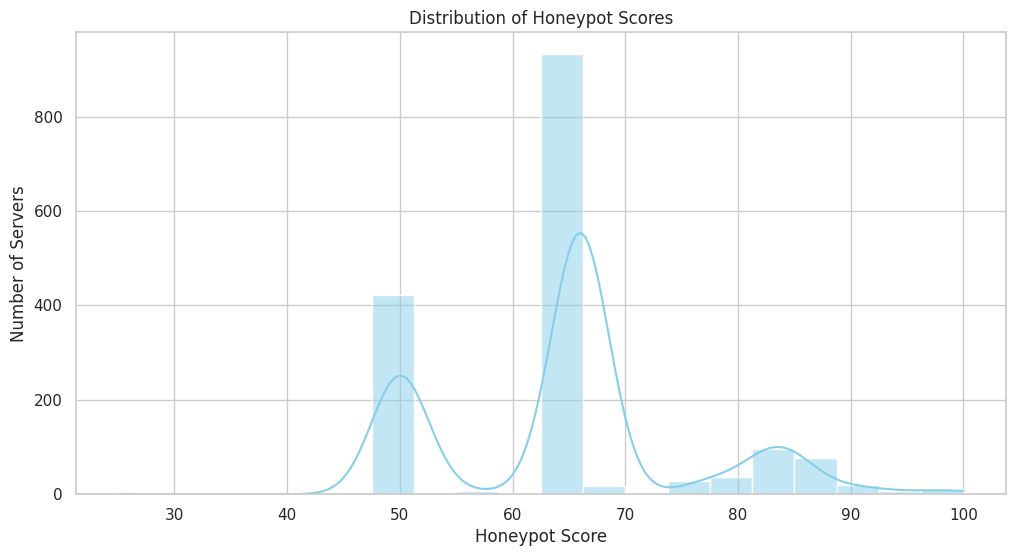

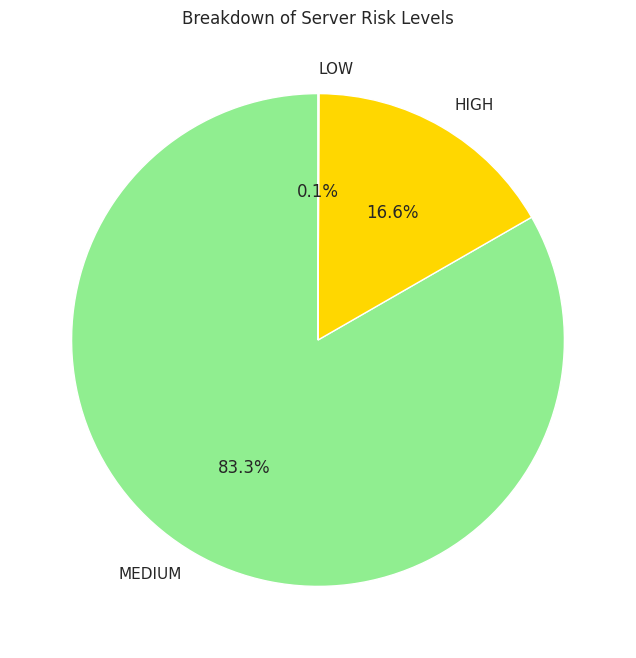

In [2]:
if not scores_df.empty:
    # Plot the distribution of scores
    plt.figure(figsize=(12, 6))
    sns.histplot(scores_df['honeypot_score'], bins=20, kde=True, color='skyblue')
    plt.title('Distribution of Honeypot Scores')
    plt.xlabel('Honeypot Score')
    plt.ylabel('Number of Servers')
    plt.show()

    # Plot the breakdown of risk levels
    risk_counts = scores_df['risk_level'].value_counts()
    plt.figure(figsize=(8, 8))
    risk_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'gold', 'lightcoral'])
    plt.title('Breakdown of Server Risk Levels')
    plt.ylabel('')
    plt.show()

## Top High-Risk Servers

In [3]:
if not scores_df.empty:
    high_risk_servers = scores_df[scores_df['risk_level'] == 'HIGH'].sort_values(by='honeypot_score', ascending=False)

    print(f"Found {len(high_risk_servers)} servers with a HIGH risk level.")
    print("\nTop 20 most suspicious servers:")
    display(high_risk_servers[['host', 'port', 'honeypot_score', 'signals']].head(20))

Found 277 servers with a HIGH risk level.

Top 20 most suspicious servers:


,host,port,honeypot_score,signals
321,86.206.48.92,50002,100,"[reused_certificate_cluster_of_20, self_signed..."
893,86.206.48.92,50002,100,"[reused_certificate_cluster_of_20, self_signed..."
486,86.206.48.92,50002,100,"[reused_certificate_cluster_of_20, self_signed..."
291,86.206.48.92,50002,100,"[reused_certificate_cluster_of_20, self_signed..."
1124,148.251.87.112,50002,99,"[reused_certificate_cluster_of_19, self_signed..."
1619,148.251.87.112,50002,99,"[reused_certificate_cluster_of_19, self_signed..."
1458,148.251.87.112,50002,99,"[reused_certificate_cluster_of_19, self_signed..."
236,86.206.48.92,50002,98,"[reused_certificate_cluster_of_20, self_signed..."
1285,86.206.48.92,50002,98,"[reused_certificate_cluster_of_20, self_signed..."
1568,86.206.48.92,50002,98,"[reused_certificate_cluster_of_20, self_signed..."


## Most Common Suspicious Signals

Now, let's analyze which signals contribute most to high scores. This helps us understand the primary characteristics of a 'honeypot' server in this network.

Most Common Signals Across ALL Servers:


signals
no_tls_certificate_detected         1335
missing_p2wpkh_support               974
cannot_serve_history                 973
missing_taproot_support              954
identical_behavior_cluster_944       944
self_signed_or_unknown_issuer        330
suspicious_subject_CN                330
identical_behavior_cluster_263       263
identical_behavior_cluster_143       143
reused_certificate_cluster_of_19     114
reused_certificate_cluster_of_20      80
identical_behavior_cluster_55         55
identical_behavior_cluster_41         41
identical_behavior_cluster_20         40
identical_behavior_cluster_19         38
Name: count, dtype: int64

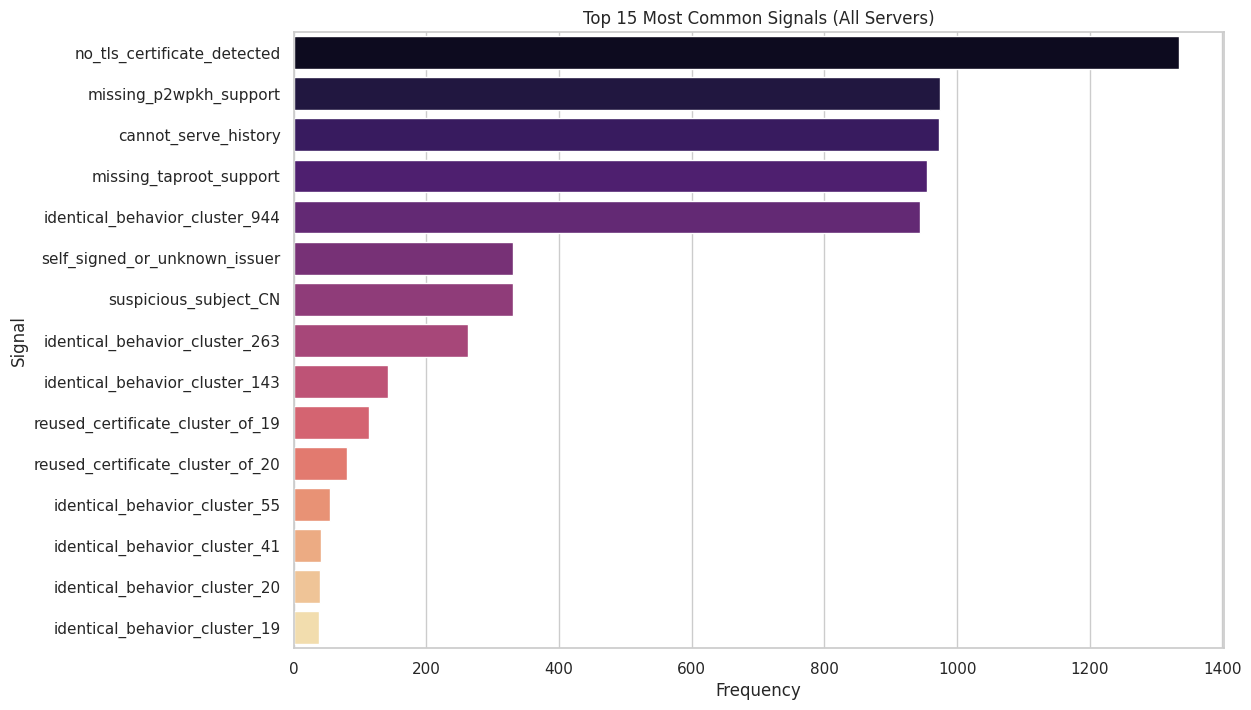


Most Common Signals in HIGH-RISK Servers:


signals
self_signed_or_unknown_issuer       276
suspicious_subject_CN               276
identical_behavior_cluster_263      165
reused_certificate_cluster_of_19    114
reused_certificate_cluster_of_20     80
missing_p2wpkh_support               42
cannot_serve_history                 35
missing_taproot_support              34
reused_certificate_cluster_of_16     32
identical_behavior_cluster_15        30
identical_behavior_cluster_944       24
identical_behavior_cluster_20        20
identical_behavior_cluster_19        19
identical_behavior_cluster_18        19
reused_certificate_cluster_of_18     18
Name: count, dtype: int64

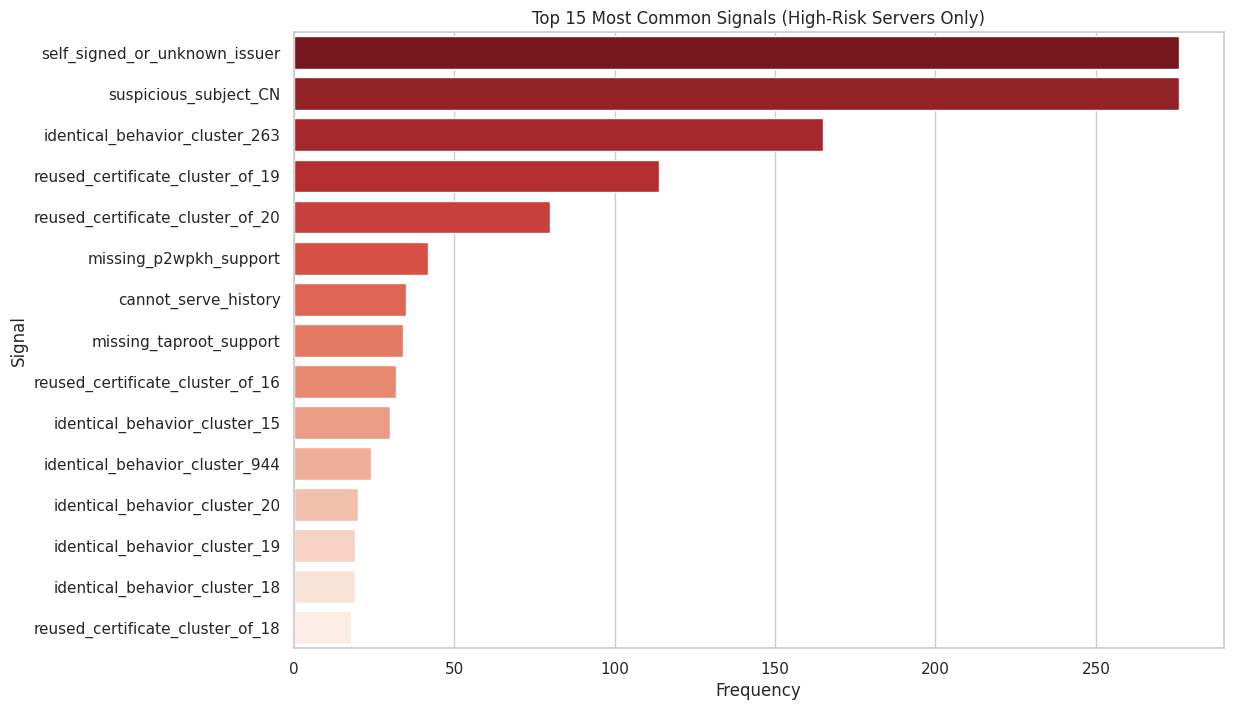

In [4]:
if not scores_df.empty:
    # 'Explode' the signals column to analyze each signal individually
    all_signals = scores_df.explode('signals')

    # --- Analysis for ALL servers ---
    print("Most Common Signals Across ALL Servers:")
    top_signals_all = all_signals['signals'].value_counts().head(15)
    display(top_signals_all)

    plt.figure(figsize=(12, 8))
    sns.barplot(x=top_signals_all.values, y=top_signals_all.index, hue=top_signals_all.index, palette='magma', legend=False)
    plt.title('Top 15 Most Common Signals (All Servers)')
    plt.xlabel('Frequency')
    plt.ylabel('Signal')
    plt.show()

    # --- Analysis for HIGH-RISK servers ---
    if not high_risk_servers.empty:
        high_risk_signals = high_risk_servers.explode('signals')
        print("\nMost Common Signals in HIGH-RISK Servers:")
        top_signals_high_risk = high_risk_signals['signals'].value_counts().head(15)
        display(top_signals_high_risk)

        plt.figure(figsize=(12, 8))
        sns.barplot(x=top_signals_high_risk.values, y=top_signals_high_risk.index, hue=top_signals_high_risk.index, palette='Reds_r', legend=False)
        plt.title('Top 15 Most Common Signals (High-Risk Servers Only)')
        plt.xlabel('Frequency')
        plt.ylabel('Signal')
        plt.show()